# HW1 - Juan Sebastian Puentes C

**Problem Definition**

**Select a stock in the S&P 500**

I will use Exxon Mobil Corporation XOM stock prices.

Collect data around 3 US economic factors such as inflation, unemployment, etc. Explain why you think those variables will help in predicting stock prices.  

For this analysis, I will select the variables GDP, unemployment, and WTI oil prices. The relationship between these variables and the stock price of Exxon Mobile is complex.GDP (Gross Domestic Product) is a measure of a country's economic output and is widely considered to be one of the most important indicators of a country's economic health. A growing GDP suggests a strong and growing economy, which could increase the demand for oil. As a result, oil companies such as Exxon Mobile could benefit from increased sales and profits. However, it is important to note that other factors, such as government regulations, geopolitical instability, and competition from other oil companies, can also affect the demand for oil and the stock price of Exxon Mobile.
 
Unemployment is another key economic indicator that can have an impact on the stock price of Exxon Mobile. Low unemployment suggests that the economy is strong and that consumers have the means to purchase goods and services, including oil. This could increase demand for oil and result in higher profits for oil companies. 

Finally, the WTI oil price is probably the most important factor to consider when analyzing the relationship between these variables and the stock price of Exxon Mobile in the short term. Higher WTI oil prices can result in higher profit margins for oil companies, as they can sell the same amount of oil at a higher price. 

It is key to notice that for the three variables, it could be scenarios in which the stock price will decrease despite having growing GDP, and/or low unemployment, and/ or high WTI prices since the stock price can be affected by other factors.


**Mention source of data. Word Count - 200-500 words**

Data from Federal Reserve Economic Data


In [251]:
# importing all the necessary packages

import json
import fredapi as fa
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import requests
import datetime 
import yfinance as yf


In [252]:
# consulting my apikey

with open('apikey.json', 'r') as f:
    secrets = json.load(f)
api_key = secrets['api_key']

In [253]:
# class that will interact with the FRED API

class FredPy:

    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
                    "?series_id={seriesID}&api_key={key}&file_type=json" + \
                    "&observation_start={start}&observation_end={end}&units={units}"

    def set_token(self, token):
        self.token = token


    def get_series(self, seriesID, start, end, units):

        # The URL string with the values inserted into it
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )

        response = requests.get(url_formatted)

        if(self.token):
            # If the response was successful, extract the data from it
            if(response.status_code == 200):
                data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                         .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                         .assign(value = lambda cols: cols['value'])\
                         .rename(columns = {'value': seriesID})

                return data


            else:
                raise Exception("Bad response from API, status code = {}".format(response.status_code))
        else:
            raise Exception("You did not specify an API key.")

In [254]:
# Instantiate fredpy object
fredpy = FredPy()

# Set the API key
fredpy.set_token(api_key)

# Test getting the GDP series
gdp = fredpy.get_series(
    seriesID = 'GDP', 
    start = '2000-01-01',
    end = '2022-12-31', 
    units = 'pc1'
)

gdp

,date,GDP
0,2000-01-01,6.27409
1,2000-04-01,7.57395
2,2000-07-01,6.51970
3,2000-10-01,5.40976
4,2001-01-01,4.67950
...,...,...
87,2021-10-01,12.18360
88,2022-01-01,10.87499
89,2022-04-01,9.55243
90,2022-07-01,9.22922


In [255]:
# Let's get the unemployment rate data
unemployment_data = fredpy.get_series(
    seriesID="UNRATE", 
    start = '2000-01-01',
    end = '2022-12-31', 
    units = 'lin'
)

# Let's get the unemployment rate data
wti = fredpy.get_series(
    seriesID="DCOILWTICO", 
    start = '2000-01-01',
    end = '2022-12-31', 
    units = 'lin'
)

unemployment_data

,date,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
271,2022-08-01,3.7
272,2022-09-01,3.5
273,2022-10-01,3.7
274,2022-11-01,3.6


In [256]:
unemployment_data = unemployment_data.set_index(['date'])
unemployment_data = unemployment_data.assign(UNRATE = lambda cols: cols['UNRATE'].astype(float))
unemployment_data.index = pd.to_datetime(unemployment_data.index)
unemployment_data.index = pd.to_datetime(unemployment_data.index.astype(str).str.slice(0,10))
unemployment_data


,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2022-08-01,3.7
2022-09-01,3.5
2022-10-01,3.7


In [257]:
gdp = gdp.set_index(['date'])
gdp = gdp.assign(GDP = lambda cols: cols['GDP'].astype(float))
gdp.index = pd.to_datetime(gdp.index,  utc=True)
gdp.index = pd.to_datetime(gdp.index.astype(str).str.slice(0,10))


In [258]:
gdp

,GDP
date,
2000-01-01,6.27409
2000-04-01,7.57395
2000-07-01,6.51970
2000-10-01,5.40976
2001-01-01,4.67950
...,...
2021-10-01,12.18360
2022-01-01,10.87499
2022-04-01,9.55243


In [259]:
wti = wti.replace('.', None)
wti = wti.assign(DCOILWTICO = lambda cols: cols['DCOILWTICO'].astype(float))
wti = wti.set_index(['date'])


wti.index = pd.to_datetime(wti.index, utc=True)
wti.index = pd.to_datetime(wti.index.astype(str).str.slice(0,10))
wti


,DCOILWTICO
date,
2000-01-03,NaN
2000-01-04,25.56
2000-01-05,24.65
2000-01-06,24.79
2000-01-07,24.79
...,...
2022-12-26,NaN
2022-12-27,79.45
2022-12-28,78.89


In [260]:
# finding the stock prices # 

yf.pdr_override()

stock_ticker = 'XOM'

stock_start_date = datetime.date(2000,1,1)
stock_end_date = datetime.date(2022,12,31)

stock_df = pdr.get_data_yahoo(stock_ticker,start=stock_start_date,end=stock_end_date)

#stock_df = pd.DataFrame(stock_df['Close'])
#stock_df.reset_index(inplace = True)
stock_df.index = stock_df.index.tz_convert('UTC')
#stock_df = pd.to_datetime(stock_df['Date'])
stock_df = pd.DataFrame(stock_df['Close'])
#stock_df.index = stock_df.index.replace(hour=0, minute=0, second=0)
stock_df.index = pd.to_datetime(stock_df.index.astype(str).str.slice(0,10))
stock_df




[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-03,39.156250
2000-01-04,38.406250
2000-01-05,40.500000
2000-01-06,42.593750
2000-01-07,42.468750
...,...
2022-12-23,108.680000
2022-12-27,110.190002
2022-12-28,108.379997


In [261]:
#Merging the tables


import datetime
import pandas as pd
days_len = 8401
variable = []
counter = []
start_date = datetime.datetime(2000,1,1)
delta = datetime.timedelta(days=1)

for day in range(days_len):
    variable.append(start_date)
    start_date += delta
    counter.append(days_len)

variable = pd.DataFrame(variable)
counter = pd.DataFrame(counter)
table = counter.merge(variable, left_index=True, right_index=True)

table = table.rename(columns={'0_x': 'Counter', '0_y': 'Date'})

#index = index.set_index([0])
#variable= pd.to_datetime(variable['Date']).tz_localize('America/New_York')
table = table.set_index(['Date'])
table.index = pd.to_datetime(table.index, utc = True)
table = pd.DataFrame(table)
table.index = pd.to_datetime(table.index.astype(str).str.slice(0,10))
table

FinalTable = table.merge(stock_df,how='left', left_index=True, right_index=True)
FinalTable = FinalTable.merge(wti,  how='left',left_index=True, right_index=True)
FinalTable = FinalTable.merge(gdp, how='left',  left_index=True, right_index=True)
FinalTable = FinalTable.merge(unemployment_data, how='left', left_index=True, right_index=True)


## EDA 

In [262]:
FinalTable = FinalTable.rename(columns={"Counter": "Counter", "Close": "XOM", "DCOILWTICO": "WTI", "GDP":"GDP", "UNRATE": "UNEMPLOYMENT"})

In [263]:
FinalTable  = FinalTable.drop(columns=['Counter'])


In [264]:
# 1. Descriptive Statistics
FinalTable.describe()

,XOM,WTI,GDP,UNEMPLOYMENT
count,5787.000000,5773.000000,92.000000,276.000000
mean,68.698104,62.605889,4.363816,5.857971
std,19.785196,26.160995,3.133250,1.959418
min,30.270000,-36.980000,-7.689370,3.500000
25%,49.745001,41.530000,3.311495,4.400000
50%,72.900002,59.810000,4.193840,5.400000
75%,84.860001,83.250000,5.590060,6.700000
max,114.180000,145.310000,17.366450,14.700000


<AxesSubplot: >

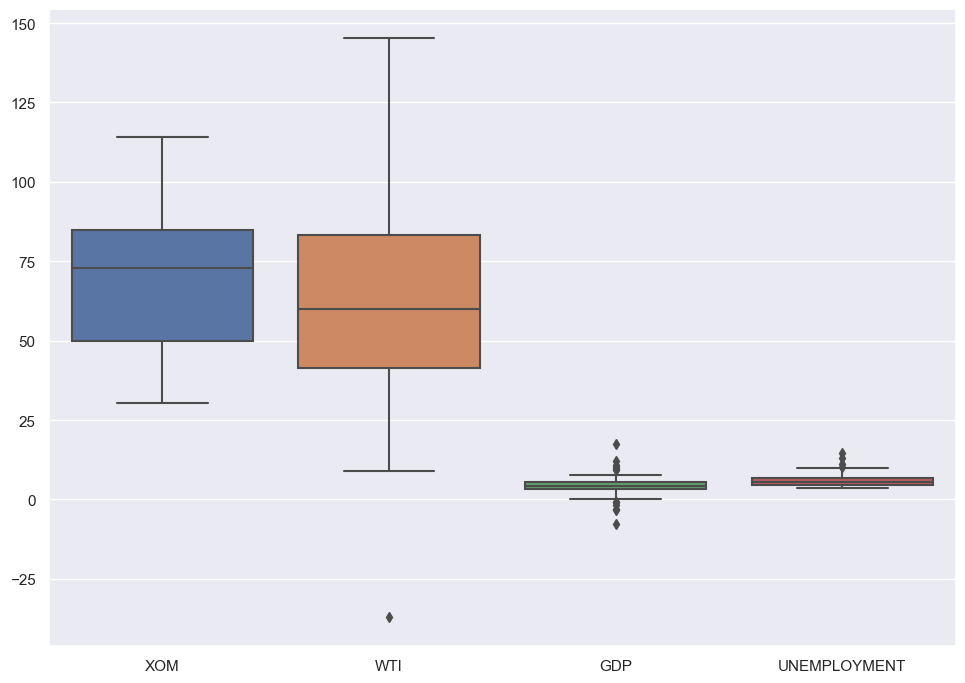

In [265]:
import seaborn as sns
sns.boxplot(FinalTable)

In [266]:
# 2. Check for missing values
FinalTable.isnull().sum()

XOM             2614
WTI             2628
GDP             8309
UNEMPLOYMENT    8125
dtype: int64

In [267]:
# 3. Find the indexes that are missing
pd.date_range(start = '2000-01-01', end = '2000-12-31' ).difference(FinalTable.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

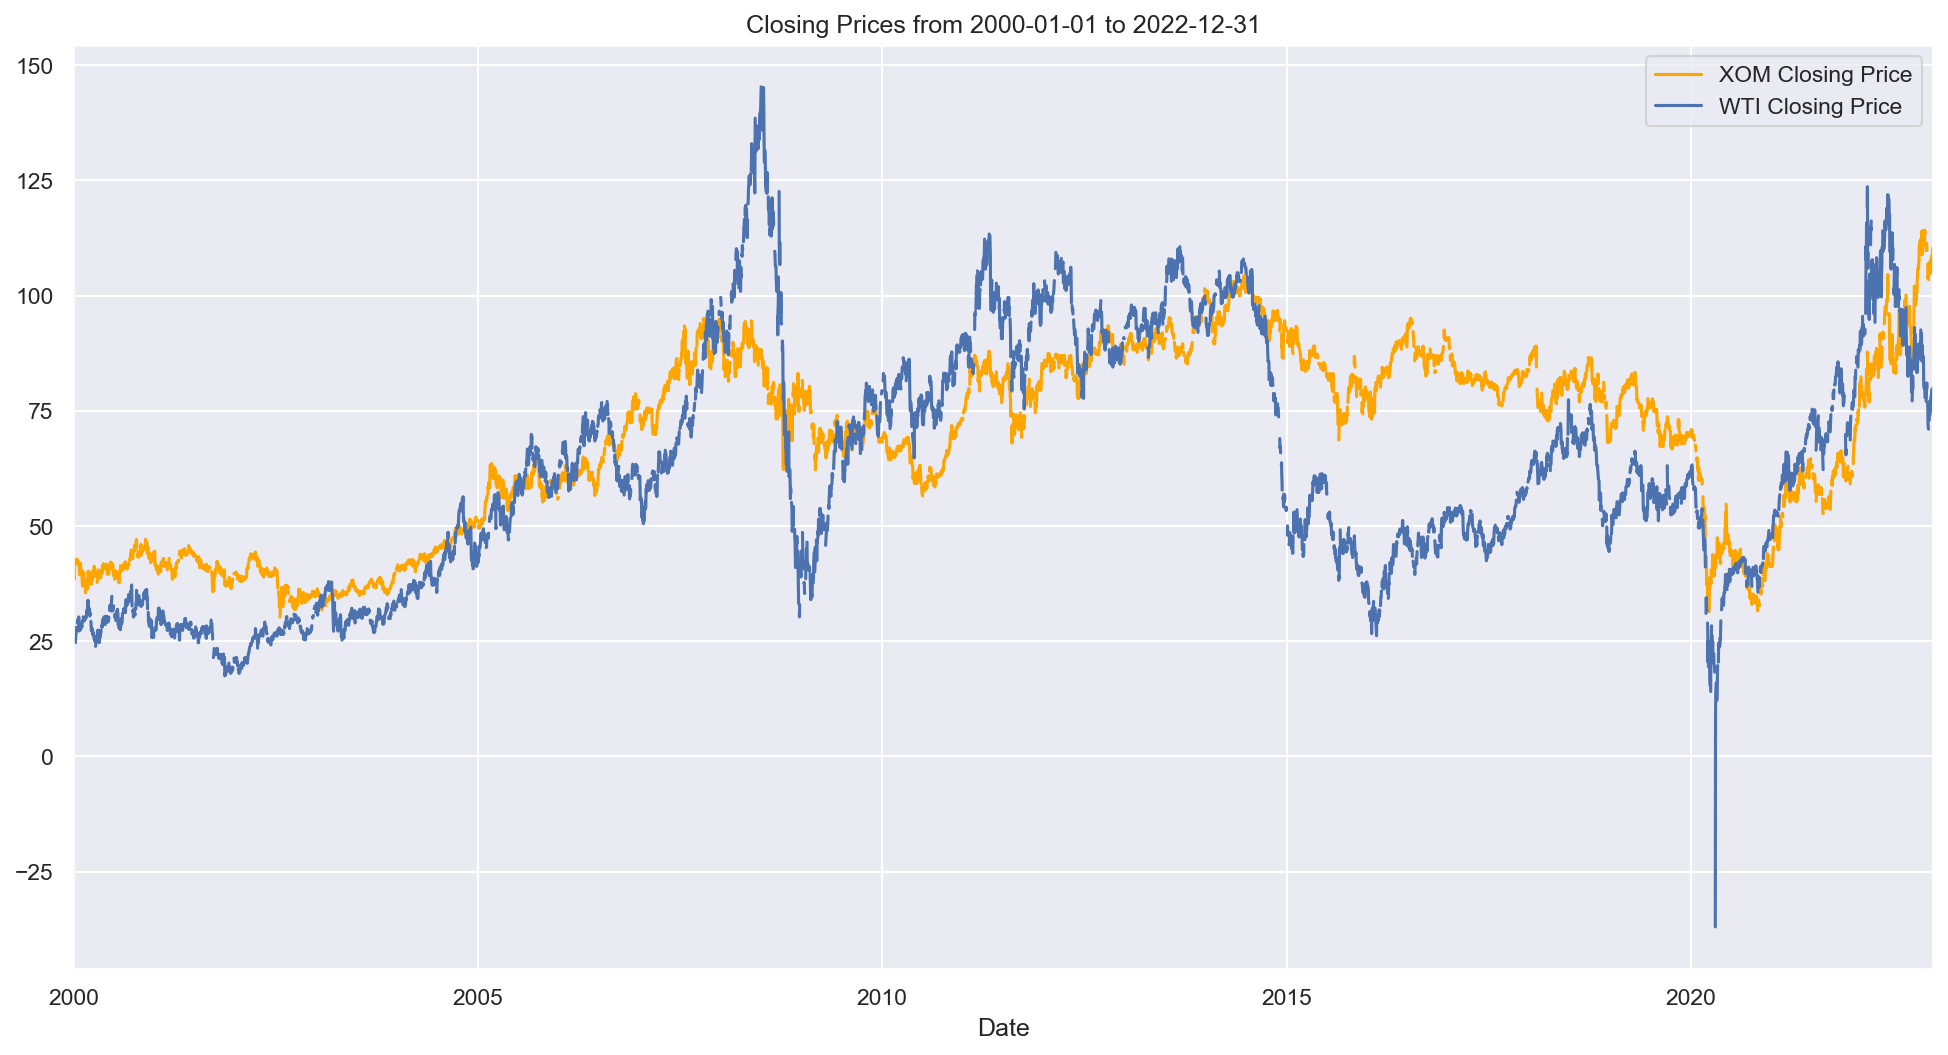

In [268]:
# Visualizing The Close Price of the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
FinalTable['XOM'].plot(label='XOM Closing Price', color='orange')
FinalTable['WTI'].plot(label='WTI Closing Price')
  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


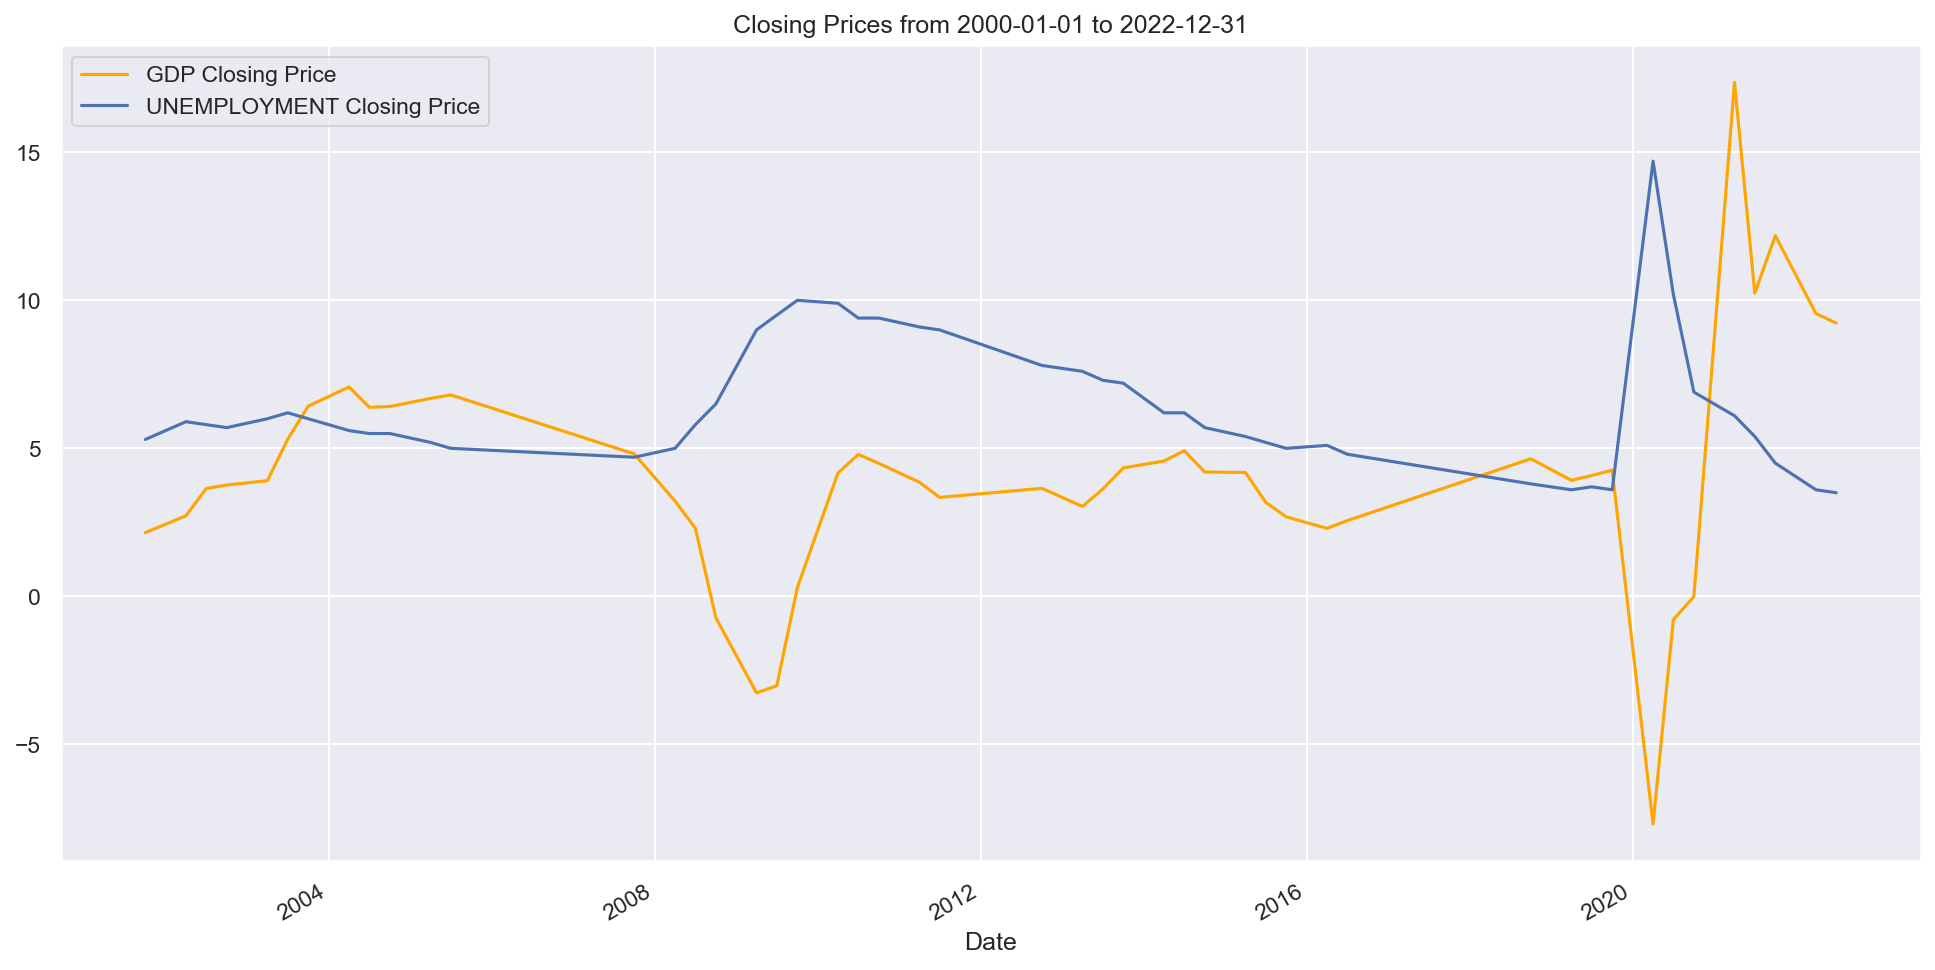

In [269]:
# Visualizing The Close Price of the stocks\

FinalTableNoNa = FinalTable.dropna()
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
FinalTableNoNa['GDP'].plot(label='GDP Closing Price', color='orange')
FinalTableNoNa['UNEMPLOYMENT'].plot(label='UNEMPLOYMENT Closing Price')
  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


In [270]:
# imputation 

FinalTable['XOM_Spline']= FinalTable['XOM'].interpolate(method='spline', order=1, limit=10, limit_direction='both')
# FinalTable['XOM_Linear']= FinalTable['XOM'].interpolate(method='linear', order=1, limit=10, limit_direction='both')
# FinalTable['XOM_ffill']= FinalTable['XOM'].fillna(method ='ffill')
# FinalTable['XOM_bfill']= FinalTable['XOM'].fillna(method ='bfill')
# FinalTable['XOM_Mean']= FinalTable['XOM'].fillna(FinalTable['XOM'].mean())
# FinalTable['XOM_Median']= FinalTable['XOM'].fillna(FinalTable['XOM'].median())

FinalTable['WTI_Spline']= FinalTable['WTI'].interpolate(method='spline', order=1, limit=10, limit_direction='both')
FinalTable['GDP_Spline']= FinalTable['GDP'].interpolate(method='spline', order=1, limit=100, limit_direction='both')
FinalTable['UNEMPLOYMENT_Spline']= FinalTable['UNEMPLOYMENT'].interpolate(method='spline', order=3, limit=50, limit_direction='both')
#FinalTable = FinalTable.drop(columns=['UNEMPLOYMENT_Linear'])

# add to FinalTable columns of the % change of the stocks and the WTI
FinalTable['XOM_Change'] = FinalTable['XOM_Spline'].pct_change()*100
FinalTable['WTI_Change'] = FinalTable['WTI_Spline'].pct_change()*100

FinalTable


,XOM,WTI,GDP,UNEMPLOYMENT,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline,XOM_Change,WTI_Change
Date,,,,,,,,,,
2000-01-01,NaN,NaN,6.27409,4.0,40.221593,23.510034,6.274090,4.000000,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,40.350164,23.788127,7.637711,2.606400,0.319656,1.182869
2000-01-03,39.156250,NaN,NaN,NaN,39.156250,24.066220,7.628252,2.614752,-2.958883,1.169041
2000-01-04,38.406250,25.56,NaN,NaN,38.406250,25.560000,7.618792,2.623091,-1.915403,6.206956
2000-01-05,40.500000,24.65,NaN,NaN,40.500000,24.650000,7.609332,2.631416,5.451587,-3.560250
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,110.190002,79.45,NaN,NaN,110.190002,79.450000,7.004710,4.068563,1.452593,1.031072
2022-12-28,108.379997,78.89,NaN,NaN,108.379997,78.890000,6.994797,4.076209,-1.642622,-0.704846
2022-12-29,109.199997,78.43,NaN,NaN,109.199997,78.430000,6.984885,4.083900,0.756597,-0.583090


<AxesSubplot: xlabel='Date'>

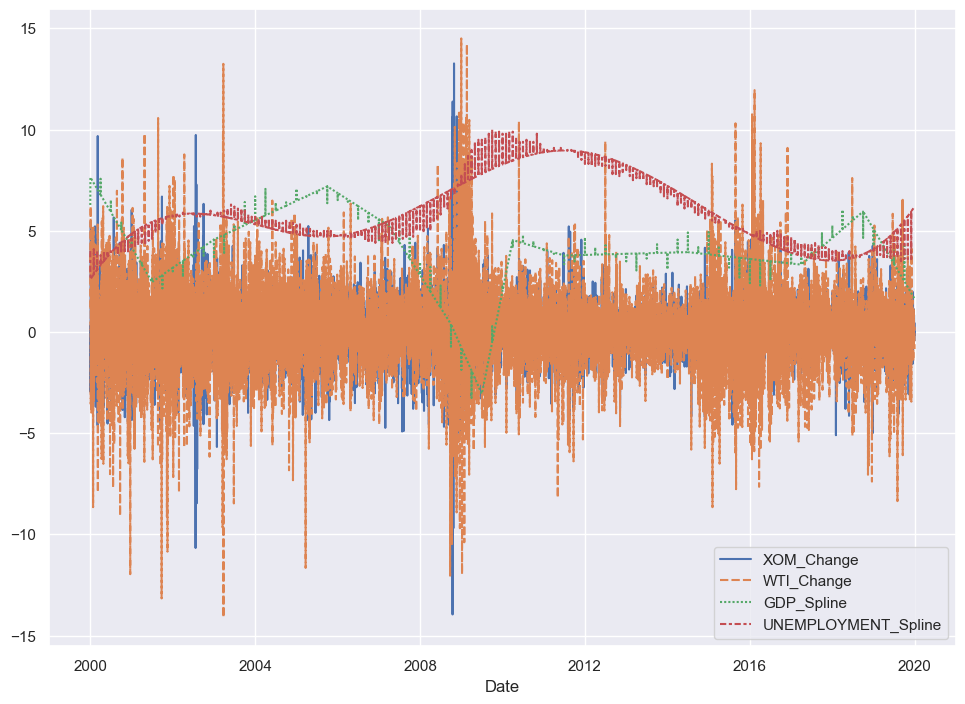

In [271]:
# plot with seaborn a line plot XOM_Change, WTI_Change, GDP_Spline, UNEMPLOYMENT_Spline and ignore 2020


FinalTableNo2020 = FinalTable[FinalTable.index < '2020-01-01']

sns.lineplot(data=FinalTableNo2020[['XOM_Change', 'WTI_Change', 'GDP_Spline', 'UNEMPLOYMENT_Spline']])





In [272]:
# Variance covatiance matrix
Table = FinalTable[['XOM_Spline', 'WTI_Spline', 'GDP_Spline', 'UNEMPLOYMENT_Spline']]
Table.cov()
Table


,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline
Date,,,,
2000-01-01,40.221593,23.510034,6.274090,4.000000
2000-01-02,40.350164,23.788127,7.637711,2.606400
2000-01-03,39.156250,24.066220,7.628252,2.614752
2000-01-04,38.406250,25.560000,7.618792,2.623091
2000-01-05,40.500000,24.650000,7.609332,2.631416
...,...,...,...,...
2022-12-27,110.190002,79.450000,7.004710,4.068563
2022-12-28,108.379997,78.890000,6.994797,4.076209
2022-12-29,109.199997,78.430000,6.984885,4.083900


<AxesSubplot: xlabel='Date', ylabel='XOM_Spline'>

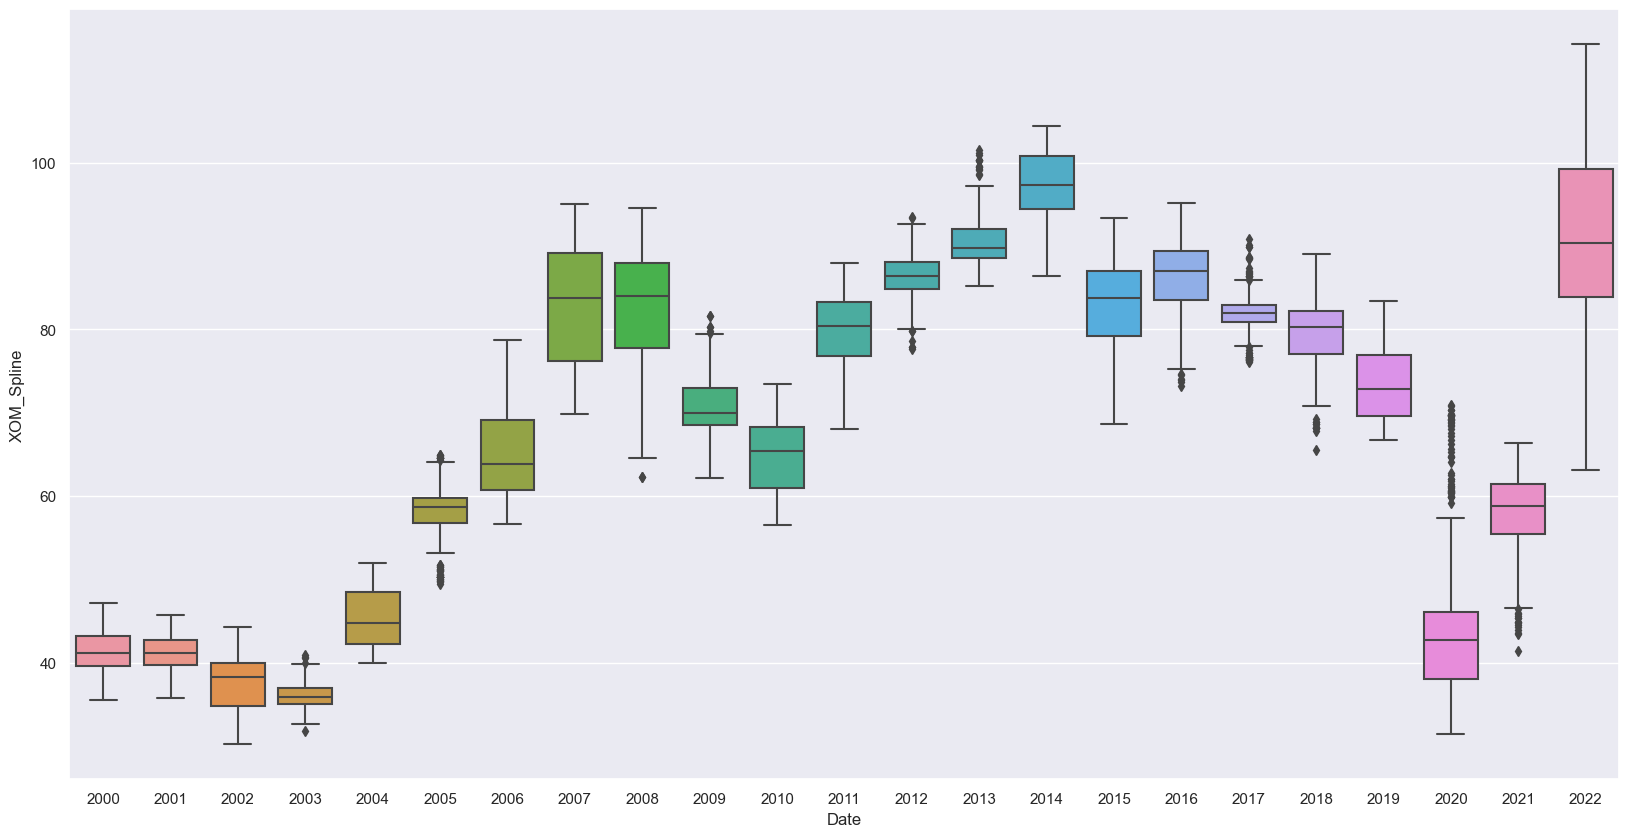

In [273]:
# price variation for each year
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = Table.index.year,
                y = Table['XOM_Spline'], 
                ax = ax)

<AxesSubplot: xlabel='Date', ylabel='XOM_Spline'>

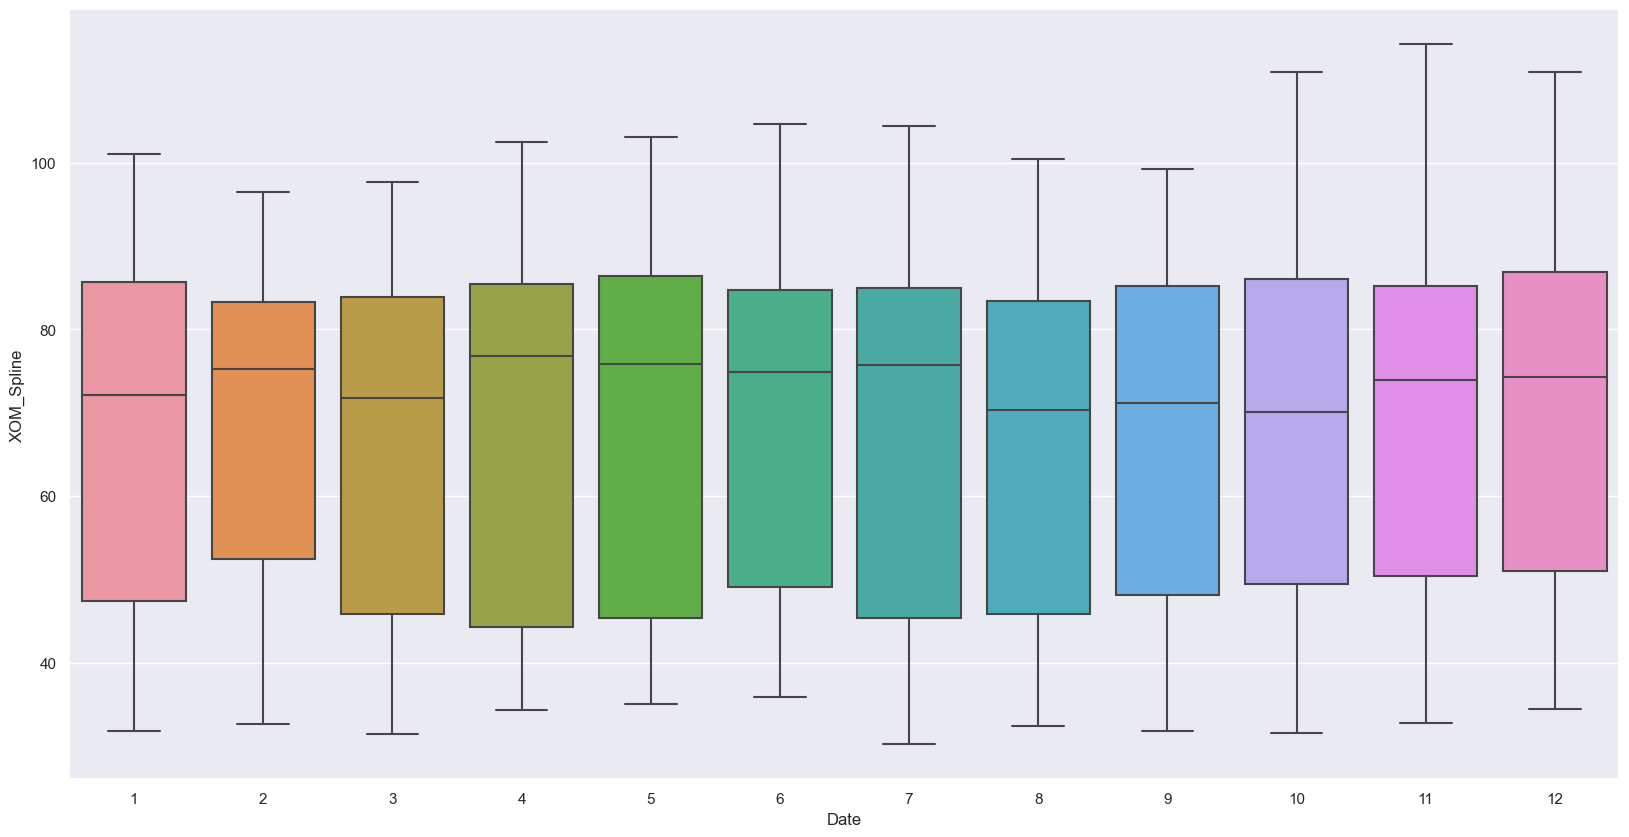

In [274]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = Table.index.month,
                y = Table['XOM_Spline'], 
                ax = ax)

In [275]:
# Regression

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model = smf.ols(formula='XOM_Spline ~ WTI_Spline + GDP_Spline + UNEMPLOYMENT_Spline', data=FinalTable)
results = model.fit()
print(results.summary())   # print the results

                            OLS Regression Results                            
Dep. Variable:             XOM_Spline   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5388.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:21:48   Log-Likelihood:                -32490.
No. Observations:                8401   AIC:                         6.499e+04
Df Residuals:                    8397   BIC:                         6.502e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              64.2688    


I decided to keep the spline since the median, mean and linear models are having behaviors that compromise the reliability of the data.


According to the OLS model, the variables are highly related to the stock price but the coefficients are kind of low, an increase of 1 point, in the GDP growth, implies a decrease of XOM stock of 2.3 dollars, as well, an increase of 1 point in the unemployment is associated with a decrease of -5.02 dollars in the price of XOM finally an increase of one dollar on WTI, is related with an increase of 0.70 dollars in the XOM price. 

In [276]:
#to improve the readability i will resample the data to monthly


df_resample_months = Table.groupby(pd.Grouper(freq='MS')).median()
#df_resample_months = df_resample.resample('M').median() - #another way of resampling
df_resample_months

,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline
Date,,,,
2000-01-01,41.875000,27.403336,7.495816,2.730295
2000-02-01,38.125000,29.510000,7.221486,2.969273
2000-03-01,38.625000,30.860000,6.937696,3.196706
2000-04-01,39.736084,25.707257,6.649176,3.416337
2000-05-01,40.746529,29.340236,6.360656,3.624538
...,...,...,...,...
2022-08-01,94.010002,93.462046,8.323079,3.437297
2022-09-01,93.878177,85.914616,8.020746,3.515548
2022-10-01,101.593820,86.930000,7.708501,3.638035


In [385]:
# porcentual change

change = df_resample_months[['XOM_Spline', 'WTI_Spline']].pct_change()*100
change = change.dropna()
change [['GDP_Spline', 'UNEMPLOYMENT_Spline']] = df_resample_months[['GDP_Spline', 'UNEMPLOYMENT_Spline']]
change

,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline
Date,,,,
2000-02-01,-8.955224,7.687617,7.221486,2.969273
2000-03-01,1.311475,4.574720,6.937696,3.196706
2000-04-01,2.876592,-16.697158,6.649176,3.416337
2000-05-01,2.542892,14.132112,6.360656,3.624538
2000-06-01,0.927373,8.848440,6.072137,3.821554
...,...,...,...,...
2022-08-01,8.499020,-7.319800,8.323079,3.437297
2022-09-01,-0.140224,-8.075395,8.020746,3.515548
2022-10-01,8.218782,1.181852,7.708501,3.638035


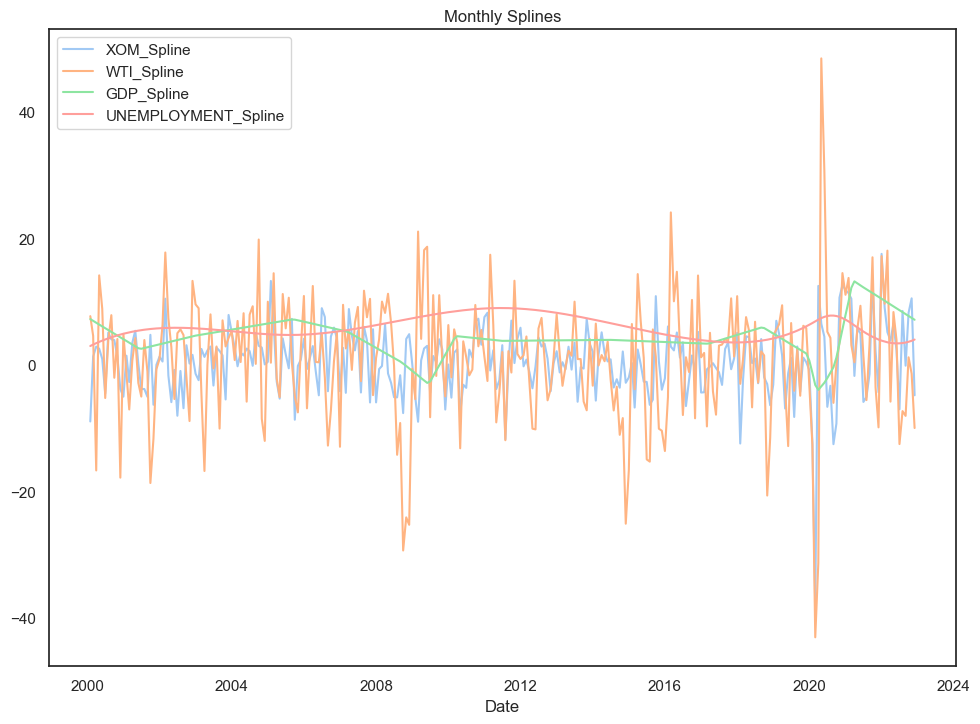

In [395]:
# seaborn plot
sns.set_style("white")
data = sns.lineplot(data=change, palette="pastel", dashes = False).set(title='Monthly Splines')

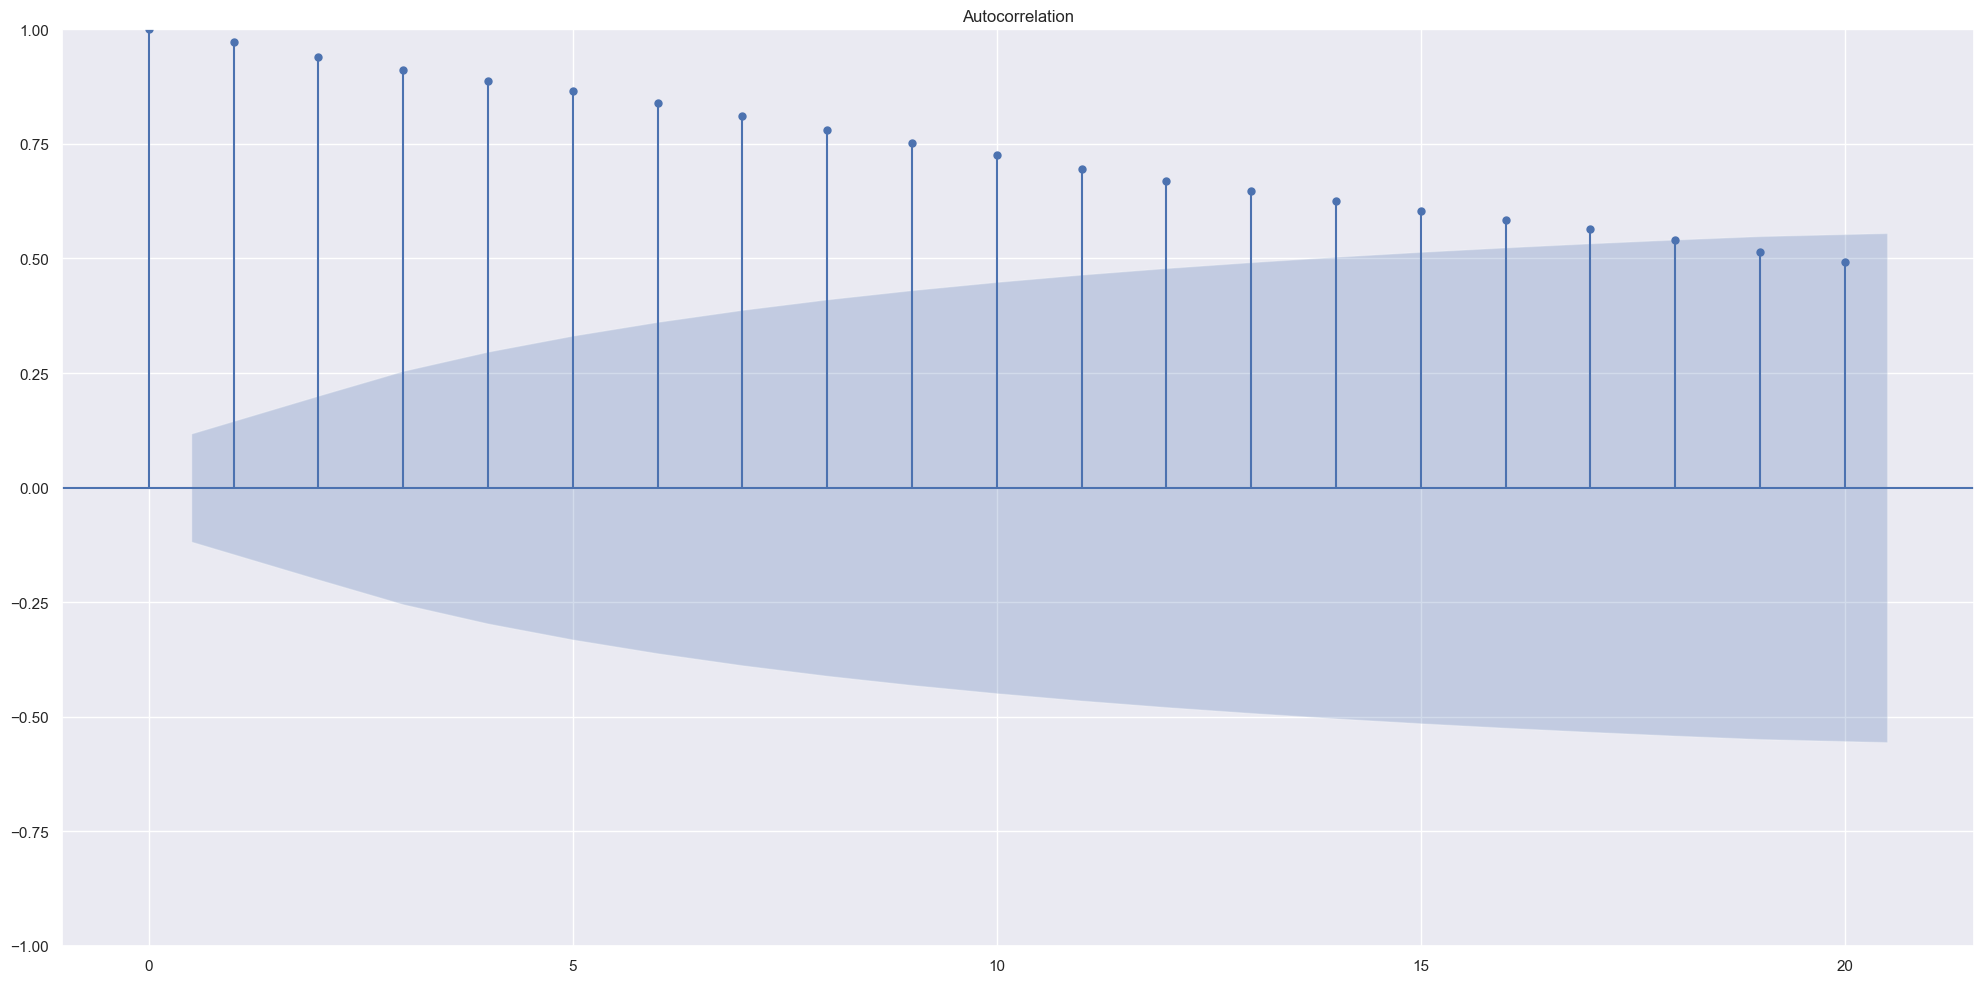

In [277]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(df_resample_months['XOM_Spline'], lags=20)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

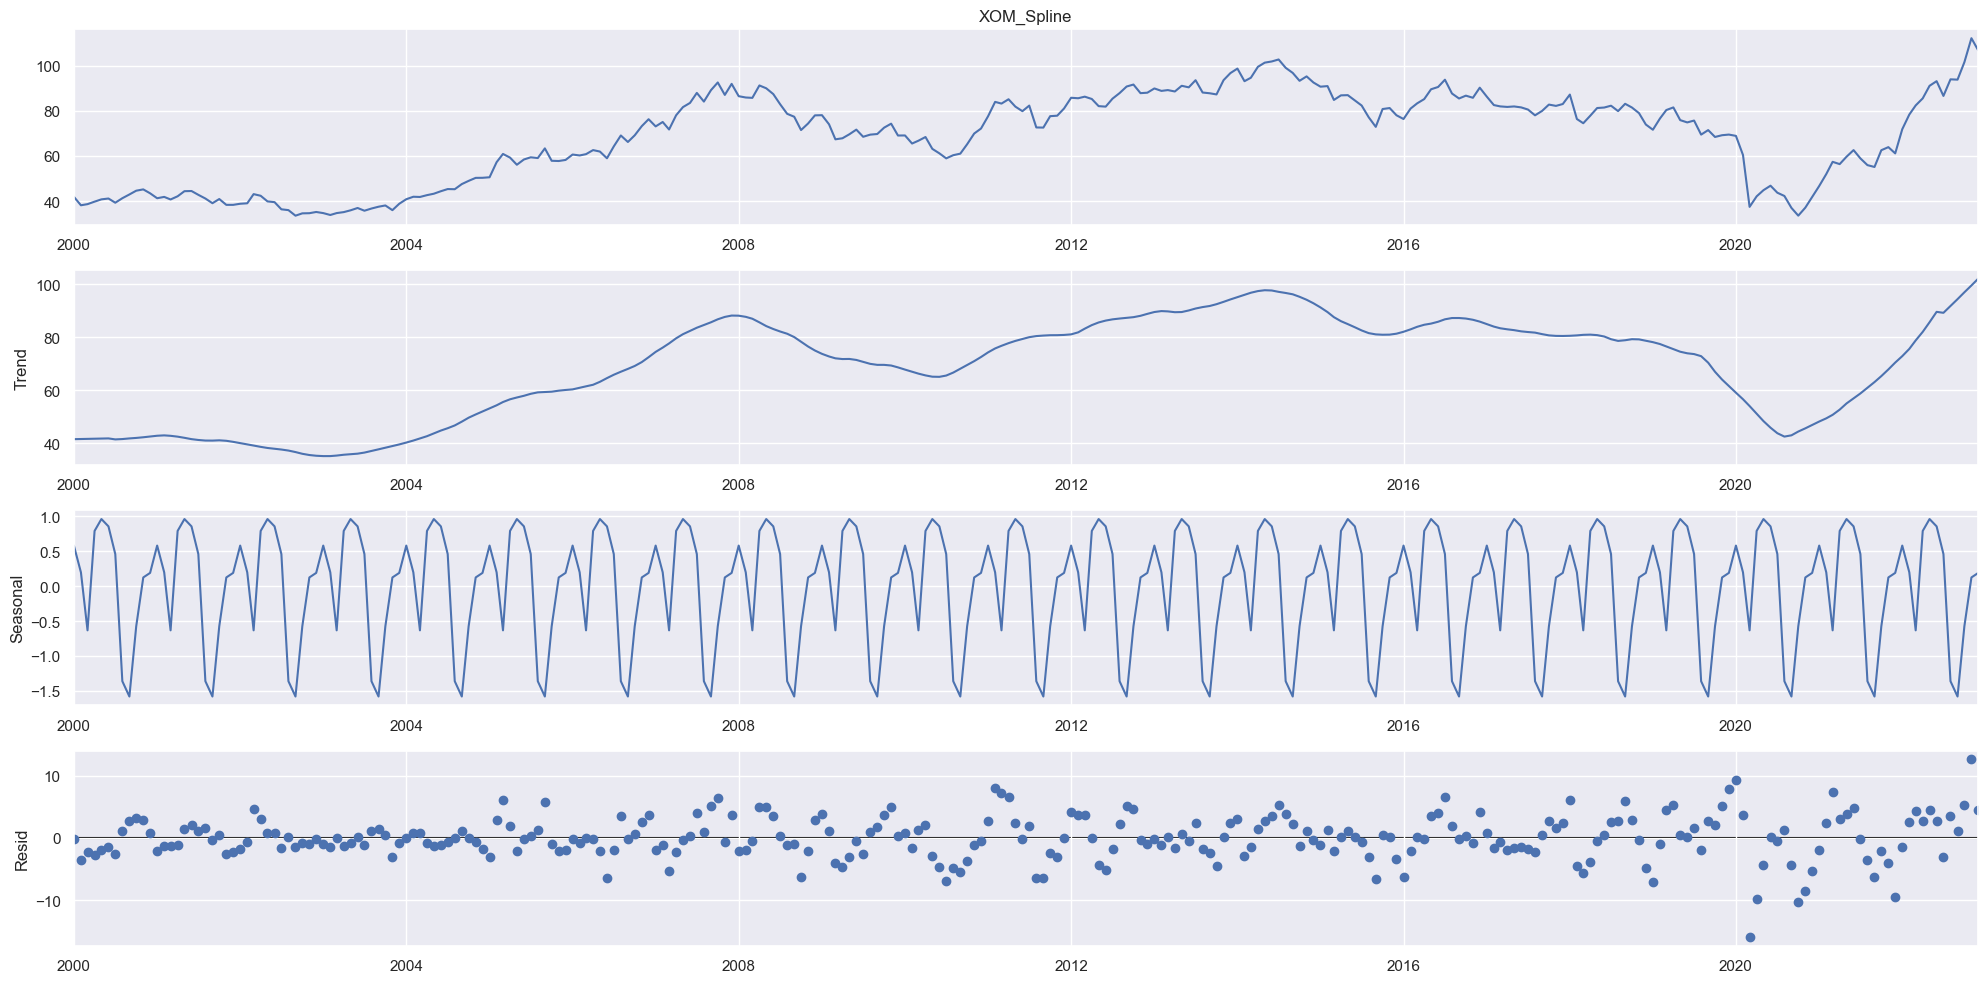

In [278]:
#Time series decomposition
res = sm.tsa.seasonal_decompose(df_resample_months['XOM_Spline'], extrapolate_trend='freq', period=12)
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [279]:
spy_df = df_resample_months[['XOM_Spline']]

# extract the decomposed terms
spy_df['trend'] = res.trend
spy_df['seasonal'] = res.seasonal
spy_df['error'] = res.resid
spy_df

C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\124190810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_df['trend'] = res.trend
C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\124190810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_df['seasonal'] = res.seasonal


,XOM_Spline,trend,seasonal,error
Date,,,,
2000-01-01,41.875000,41.465685,0.579951,-0.170636
2000-02-01,38.125000,41.523001,0.196646,-3.594647
2000-03-01,38.625000,41.580317,-0.633478,-2.321839
2000-04-01,39.736084,41.637632,0.789543,-2.691092
2000-05-01,40.746529,41.694948,0.959857,-1.908276
...,...,...,...,...
2022-08-01,94.010002,91.800607,-1.361773,3.571168
2022-09-01,93.878177,94.385172,-1.580874,1.073880
2022-10-01,101.593820,96.969737,-0.575497,5.199581


<AxesSubplot: >

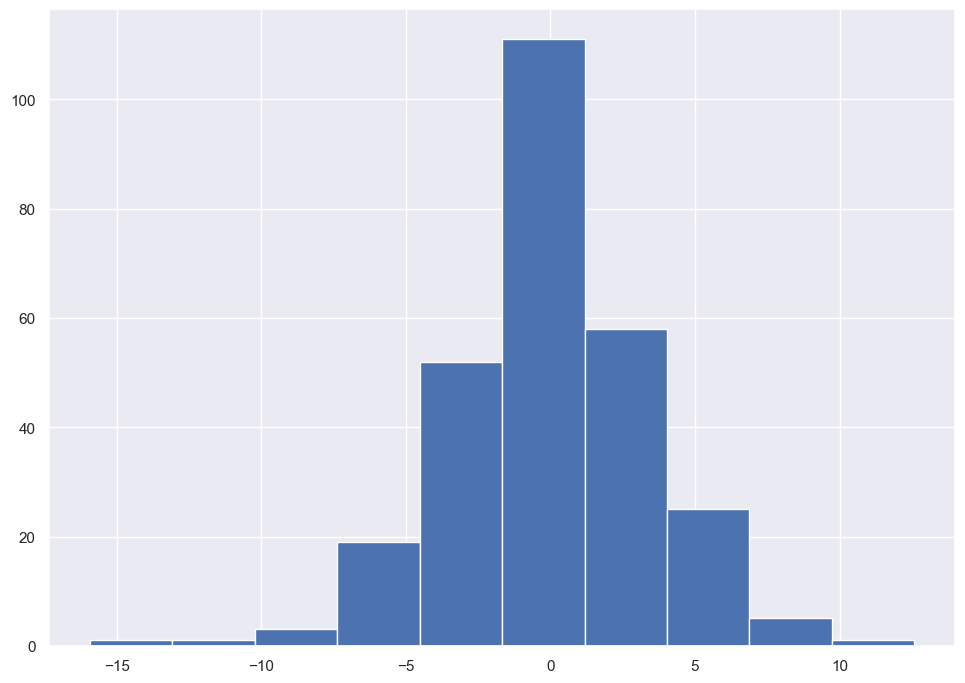

In [280]:
spy_df['error'].hist()

In [281]:
df_resample_months

,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline
Date,,,,
2000-01-01,41.875000,27.403336,7.495816,2.730295
2000-02-01,38.125000,29.510000,7.221486,2.969273
2000-03-01,38.625000,30.860000,6.937696,3.196706
2000-04-01,39.736084,25.707257,6.649176,3.416337
2000-05-01,40.746529,29.340236,6.360656,3.624538
...,...,...,...,...
2022-08-01,94.010002,93.462046,8.323079,3.437297
2022-09-01,93.878177,85.914616,8.020746,3.515548
2022-10-01,101.593820,86.930000,7.708501,3.638035


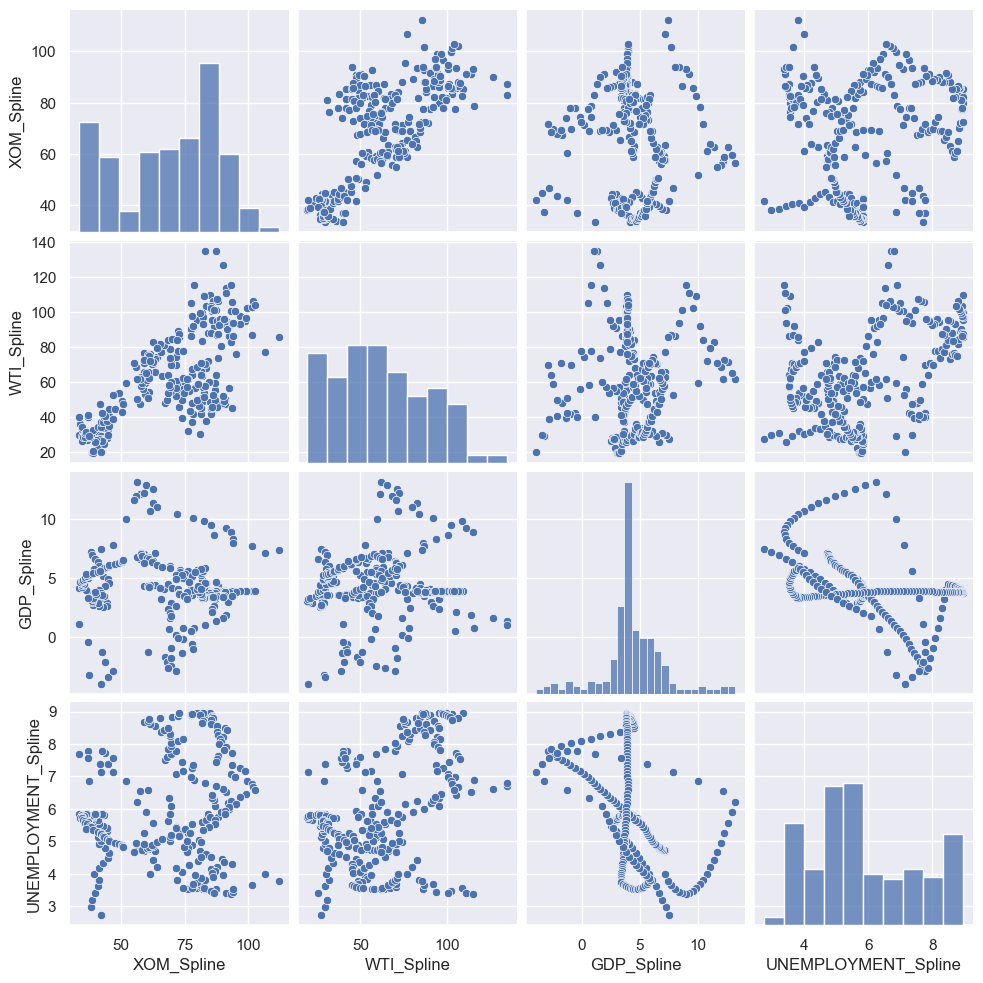

In [282]:
sns.pairplot(df_resample_months)

In [283]:
#Correlation matrix
df_resample_months.corr()

,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline
XOM_Spline,1.000000,0.732655,-0.056870,0.109467
WTI_Spline,0.732655,1.000000,0.088636,0.414515
GDP_Spline,-0.056870,0.088636,1.000000,-0.452154
UNEMPLOYMENT_Spline,0.109467,0.414515,-0.452154,1.000000


In [284]:
differenced = df_resample_months.diff()
differenced

,XOM_Spline,WTI_Spline,GDP_Spline,UNEMPLOYMENT_Spline
Date,,,,
2000-01-01,NaN,NaN,NaN,NaN
2000-02-01,-3.750000,2.106664,-0.274330,0.238979
2000-03-01,0.500000,1.350000,-0.283790,0.227432
2000-04-01,1.111084,-5.152743,-0.288520,0.219632
2000-05-01,1.010446,3.632978,-0.288520,0.208201
...,...,...,...,...
2022-08-01,7.364056,-7.381550,-0.307289,0.045465
2022-09-01,-0.131825,-7.547430,-0.302333,0.078251
2022-10-01,7.715643,1.015384,-0.312245,0.122487


<AxesSubplot: xlabel='Date'>

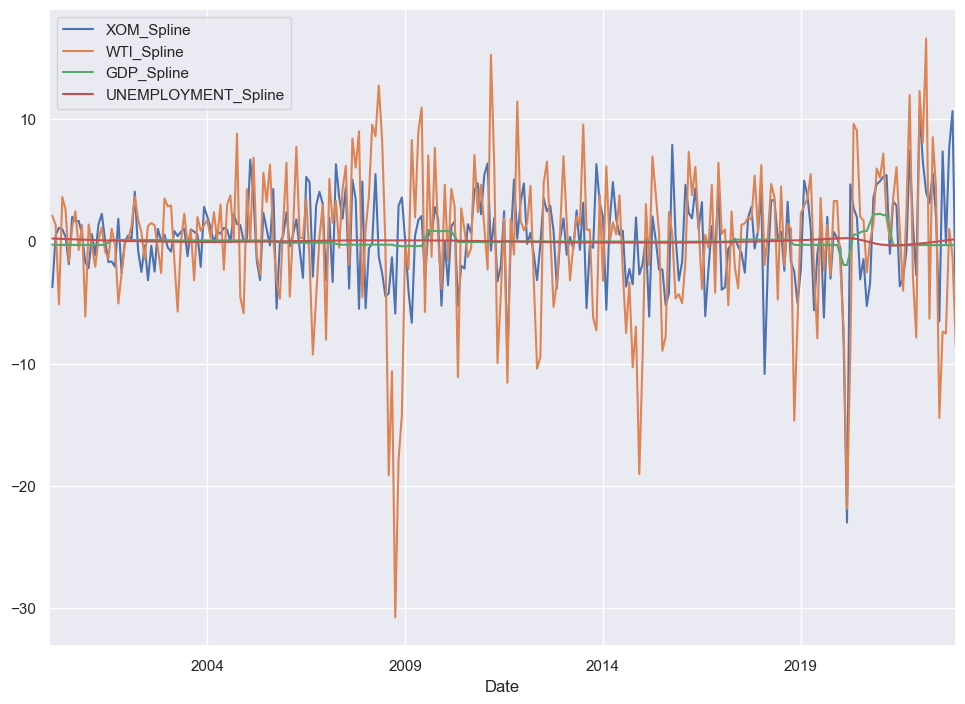

In [285]:
differenced.plot()

In [286]:
spy = spy_df[['XOM_Spline']]

In [287]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(spy, test_size=0.08, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 253
No. of testing examples: 23


In [288]:
train_data

,XOM_Spline
Date,
2000-01-01,41.875000
2000-02-01,38.125000
2000-03-01,38.625000
2000-04-01,39.736084
2000-05-01,40.746529
...,...
2020-09-01,36.950001
2020-10-01,33.520377
2020-11-01,37.074999


In [289]:
test_data

,XOM_Spline
Date,
2021-02-01,51.972455
2021-03-01,57.400002
2021-04-01,56.391144
2021-05-01,59.662187
2021-06-01,62.605000
2021-07-01,58.930000
2021-08-01,55.939999
2021-09-01,55.120001
2021-10-01,62.560001


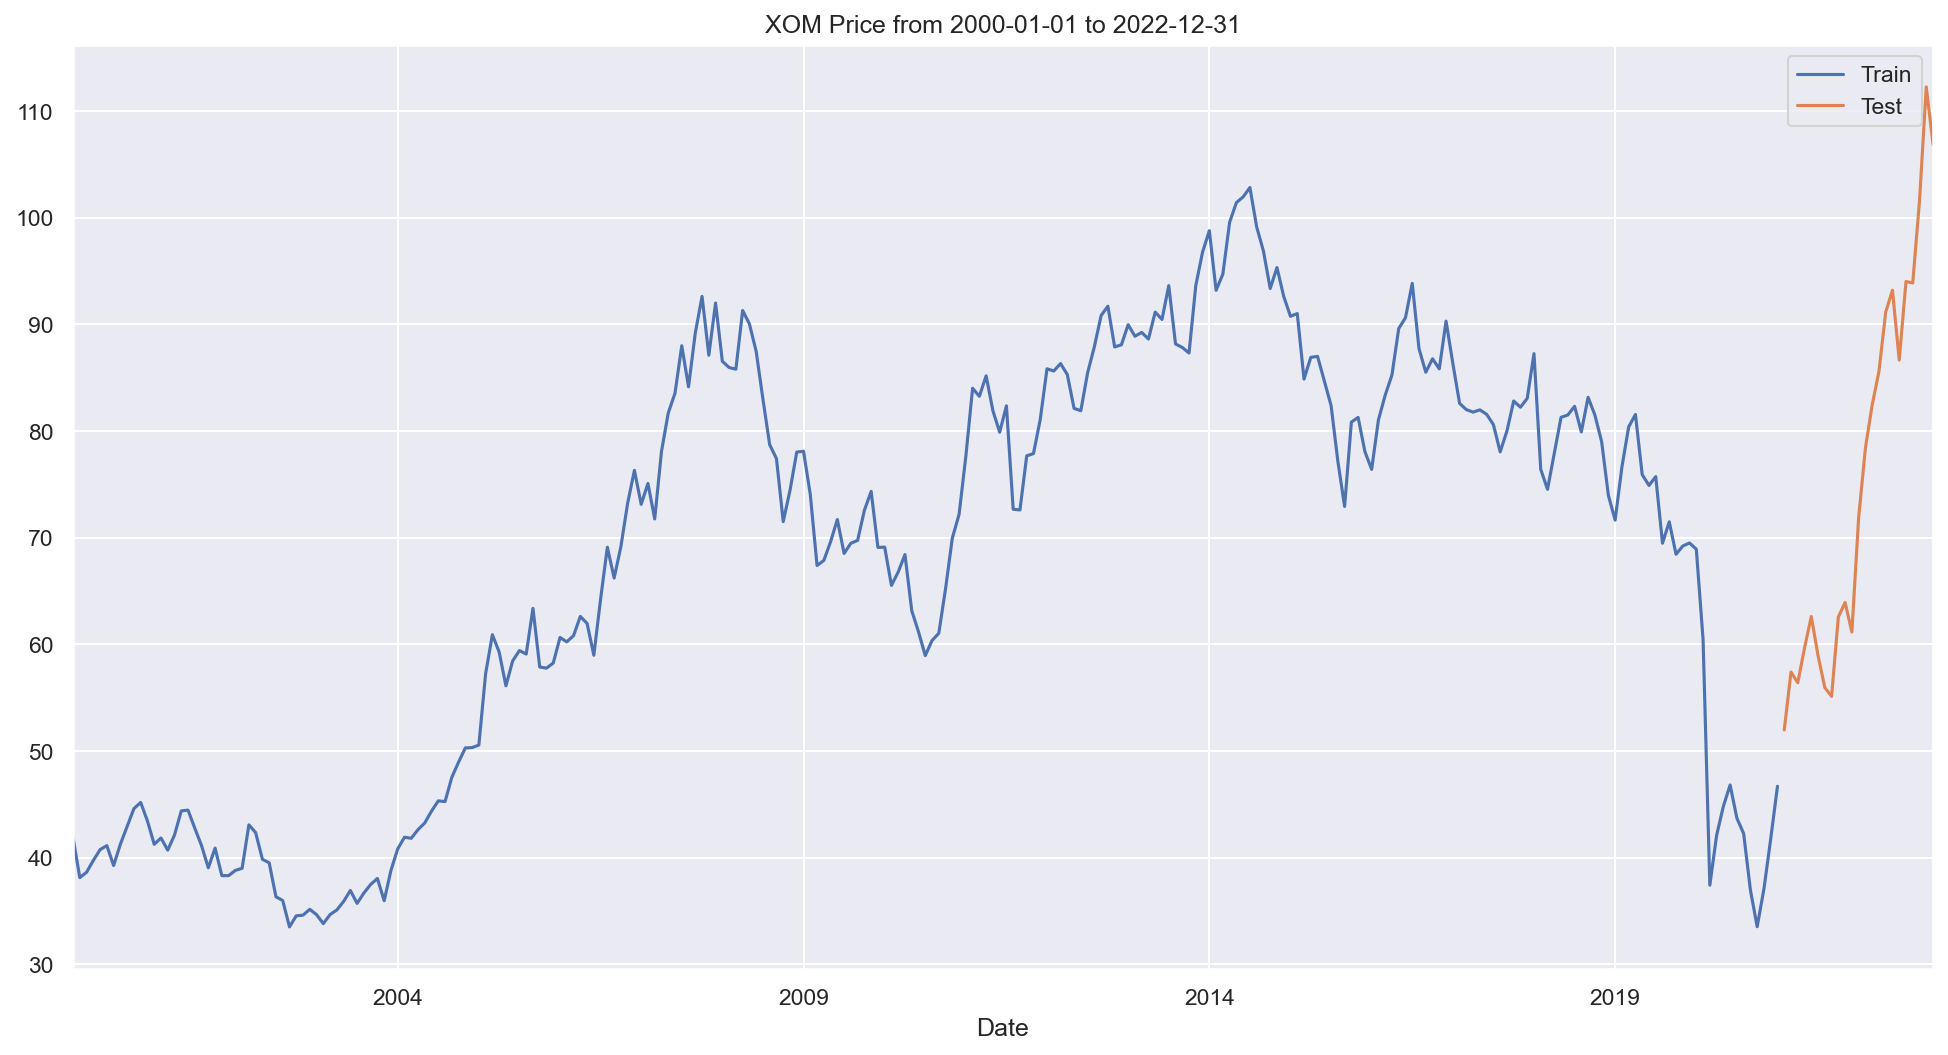

In [290]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
train_data['XOM_Spline'].plot(label='Train')
test_data['XOM_Spline'].plot(label='Test')

  
# adding title to the plot
plt.title('XOM Price from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axisplt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

In [327]:
from statsmodels.tsa.api import SimpleExpSmoothing

ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(23).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5,optimized=False)
ins_cast2 = ins2.forecast(23).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(23).rename('alpha=%s'%ins3.model.params['smoothing_level'])


In [328]:
ins_cast1

2021-02-01    43.629679
2021-03-01    43.629679
2021-04-01    43.629679
2021-05-01    43.629679
2021-06-01    43.629679
2021-07-01    43.629679
2021-08-01    43.629679
2021-09-01    43.629679
2021-10-01    43.629679
2021-11-01    43.629679
2021-12-01    43.629679
2022-01-01    43.629679
2022-02-01    43.629679
2022-03-01    43.629679
2022-04-01    43.629679
2022-05-01    43.629679
2022-06-01    43.629679
2022-07-01    43.629679
2022-08-01    43.629679
2022-09-01    43.629679
2022-10-01    43.629679
2022-11-01    43.629679
2022-12-01    43.629679
Freq: MS, Name: alpha=0.2, dtype: float64

In [329]:
test_data

,XOM_Spline
Date,
2021-02-01,51.972455
2021-03-01,57.400002
2021-04-01,56.391144
2021-05-01,59.662187
2021-06-01,62.605000
2021-07-01,58.930000
2021-08-01,55.939999
2021-09-01,55.120001
2021-10-01,62.560001


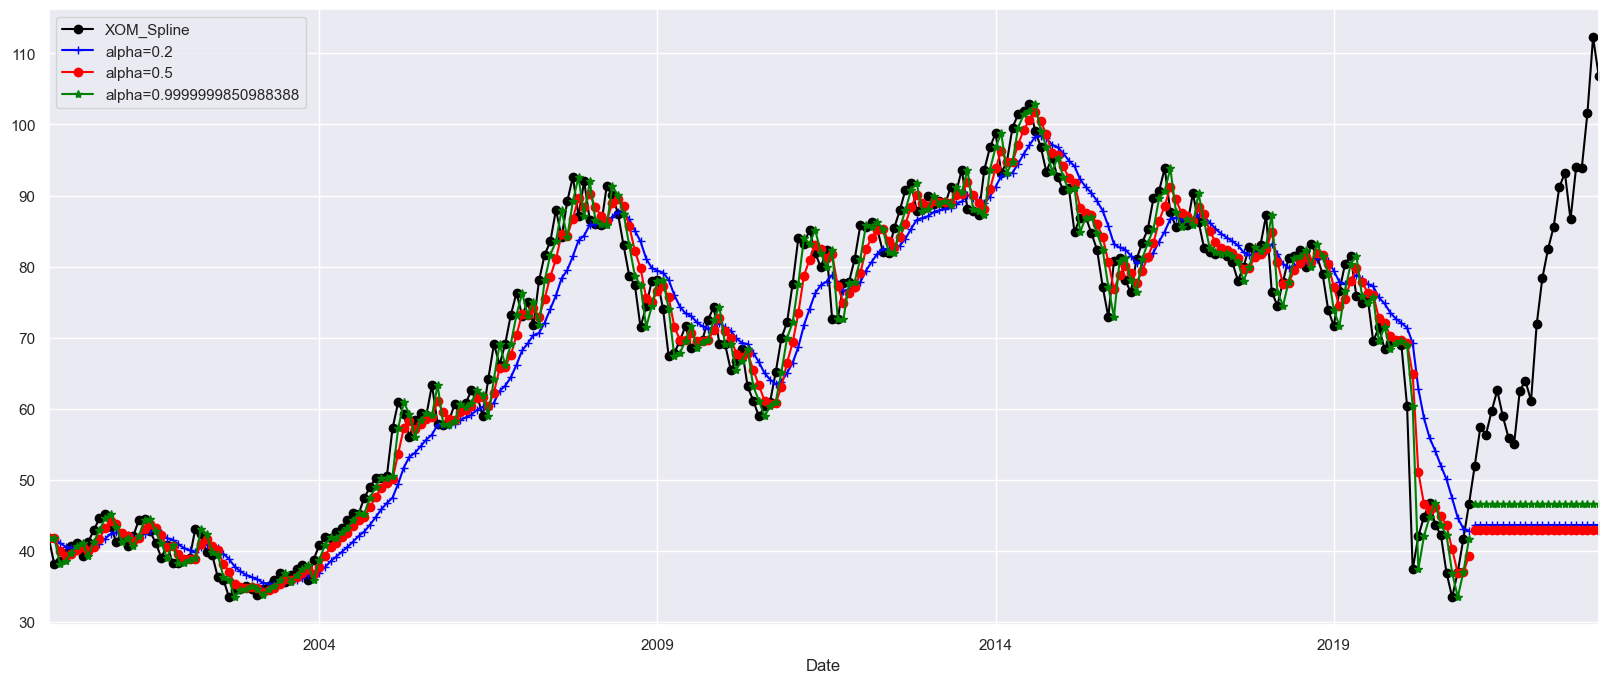

In [330]:
#After creating model we will visualize the plot
ax = spy.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.5
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

In [331]:
## Double ETS

from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing

double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(23)
double_ets_mul_pred = double_ets_mul.forecast(23)




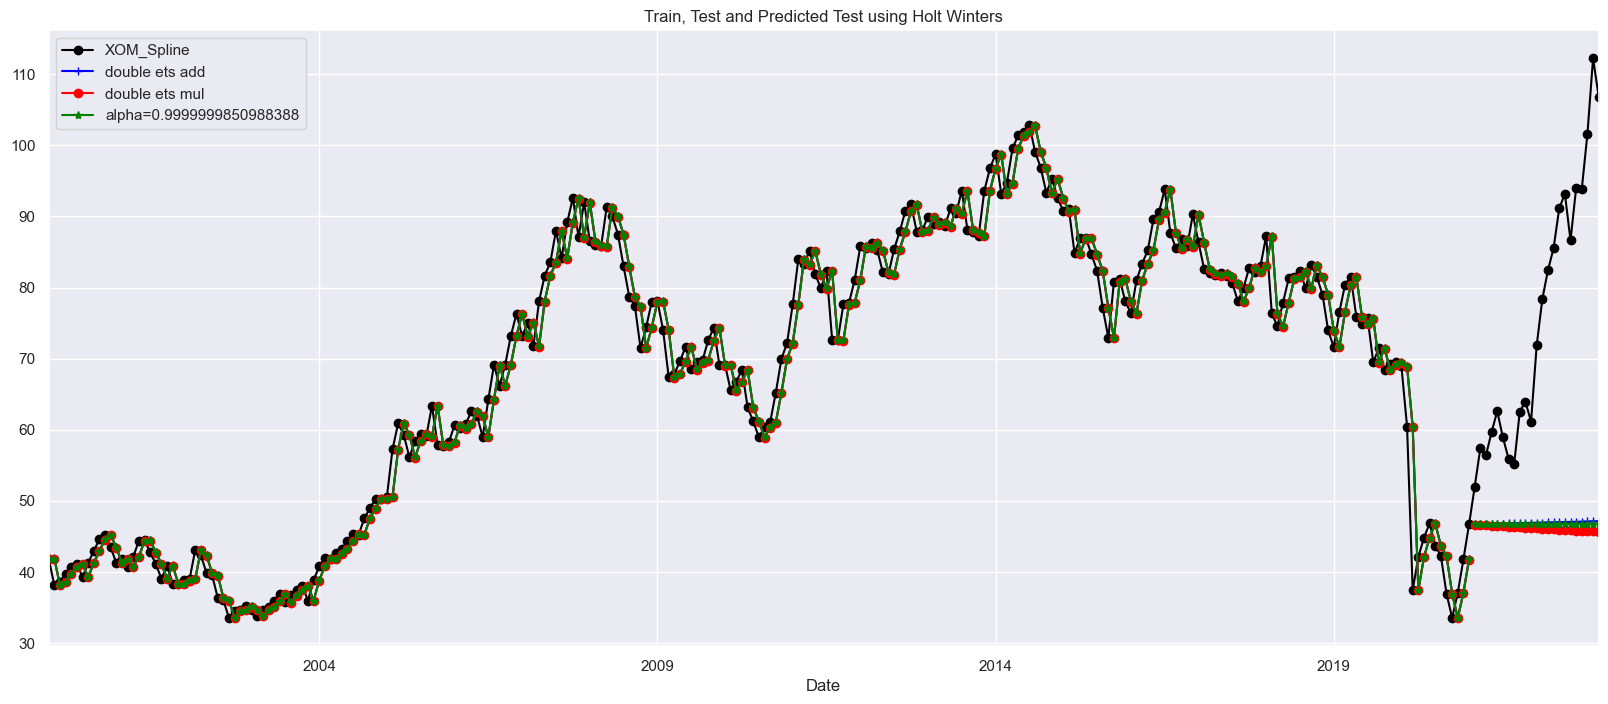

In [332]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = spy.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()

In [334]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(23)
triple_ets_mul_pred = triple_ets_mul.forecast(23)

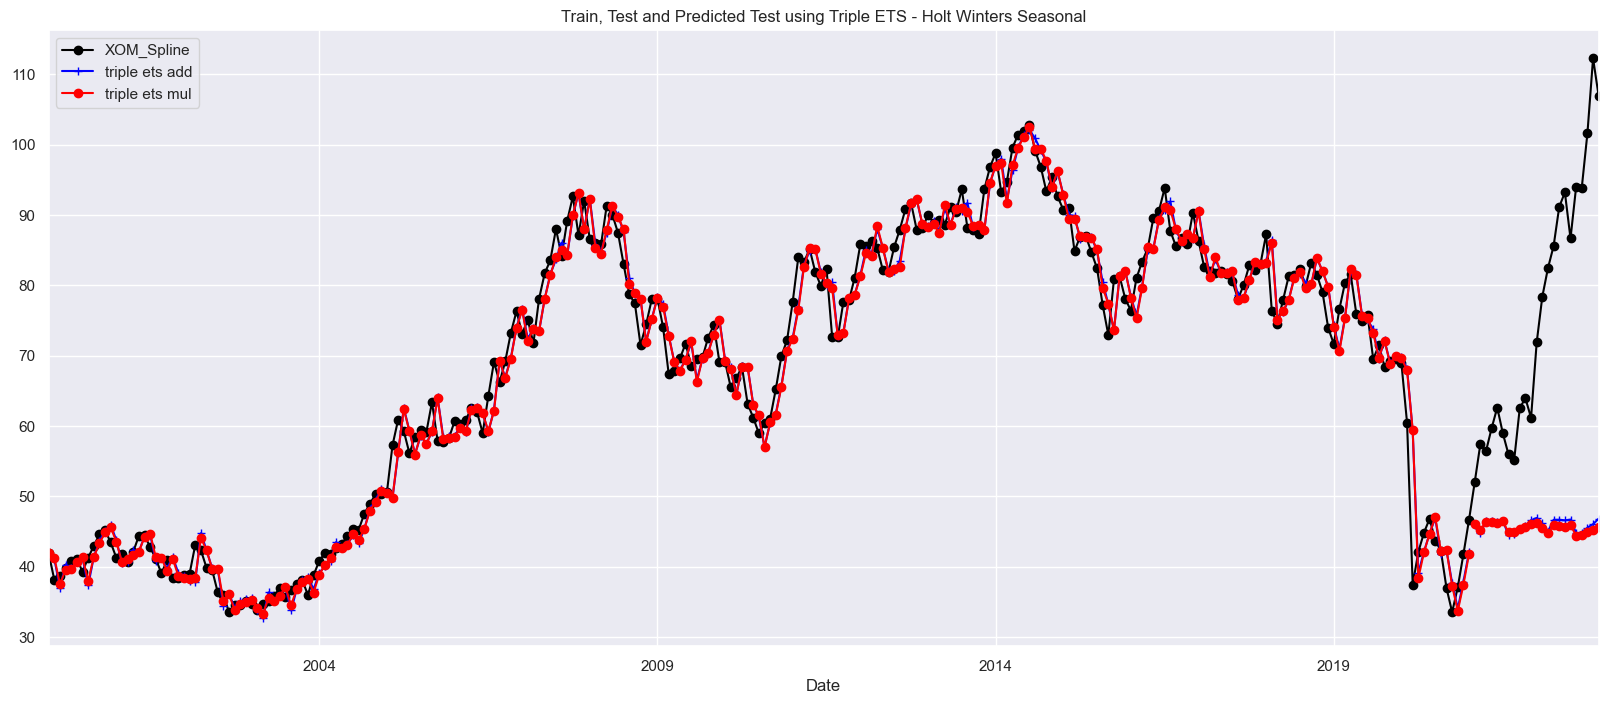

In [335]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = spy.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

In [336]:
test_data

,XOM_Spline
Date,
2021-02-01,51.972455
2021-03-01,57.400002
2021-04-01,56.391144
2021-05-01,59.662187
2021-06-01,62.605000
2021-07-01,58.930000
2021-08-01,55.939999
2021-09-01,55.120001
2021-10-01,62.560001


In [337]:
#calculate residuals
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)

In [338]:
residuals

,0
0,6.068577
1,12.647744
2,9.964712
3,13.221184
4,16.255130
5,12.466635
6,11.416301
7,10.500690
8,17.260945
9,18.119424


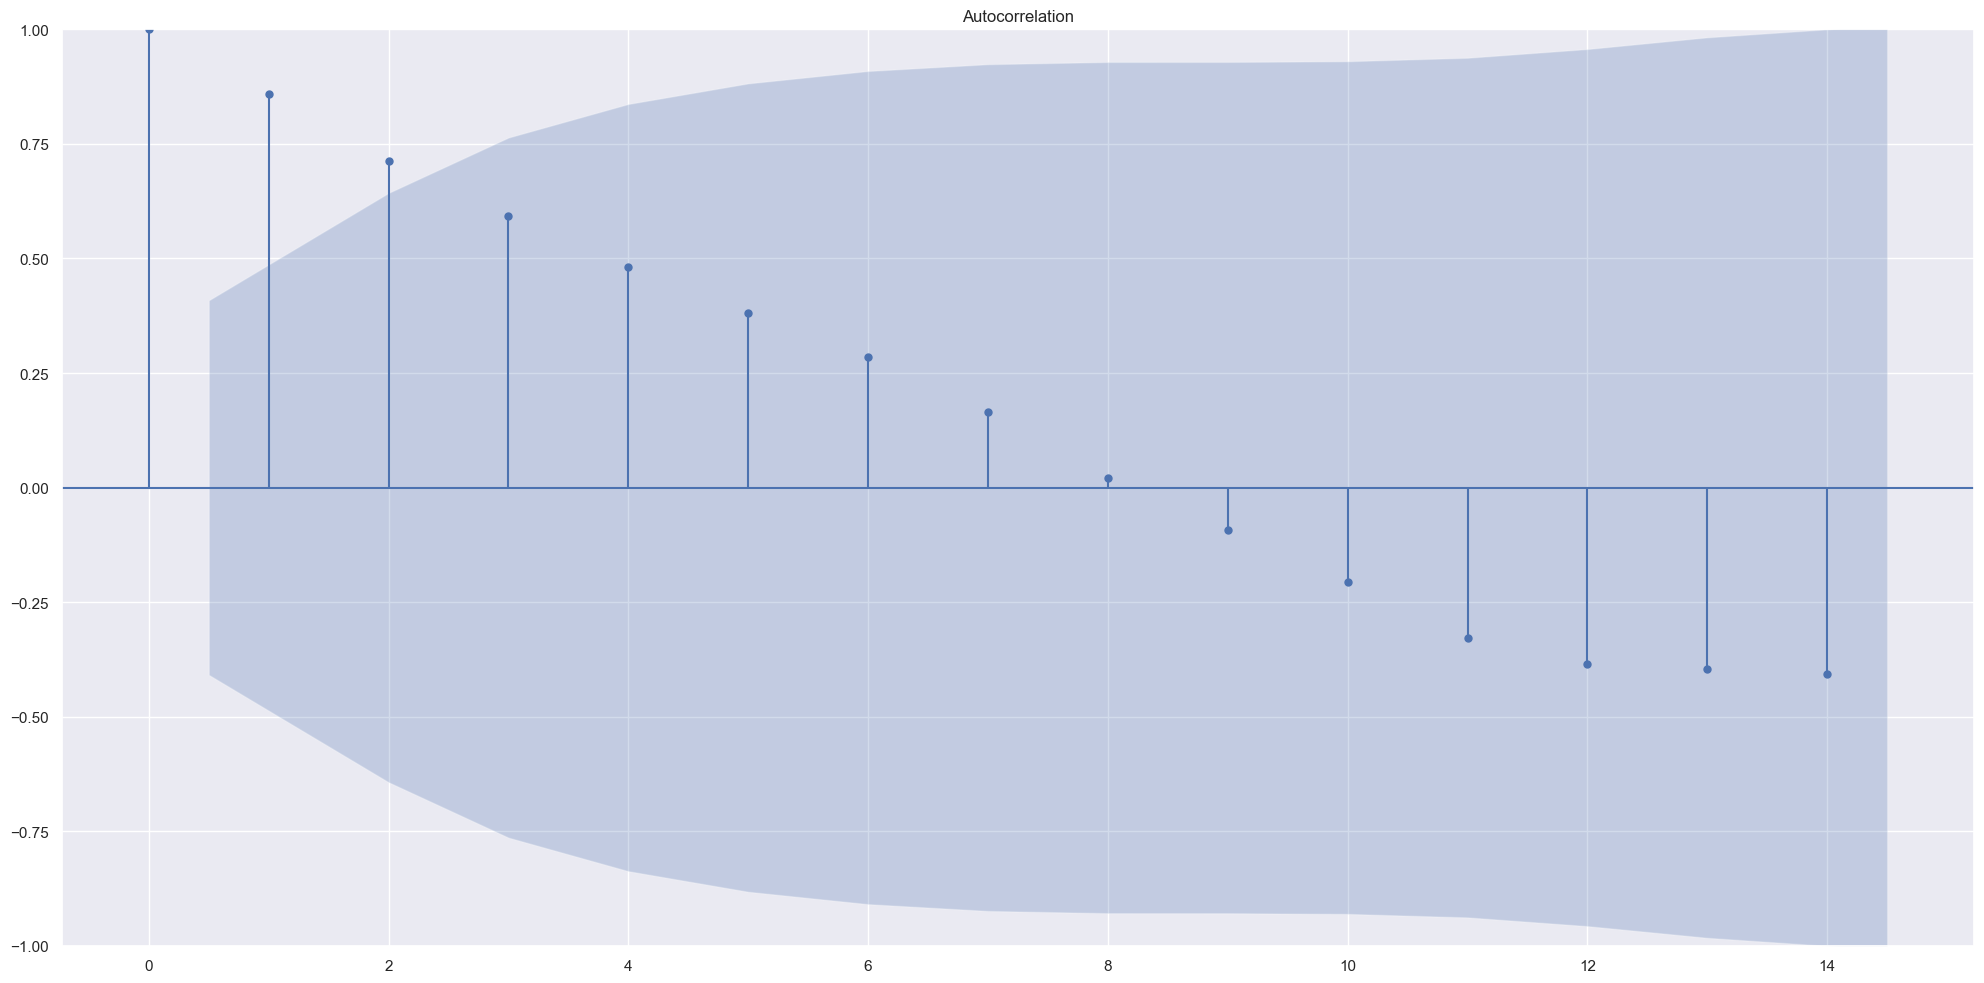

In [339]:
fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

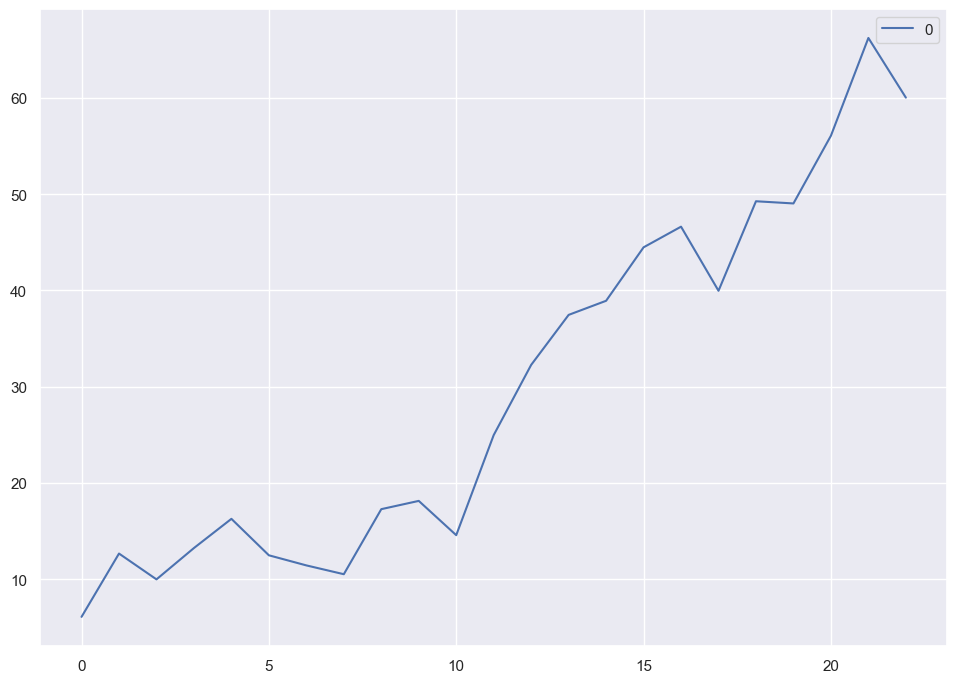

In [340]:
# plot residuals
residuals.plot()
plt.show()

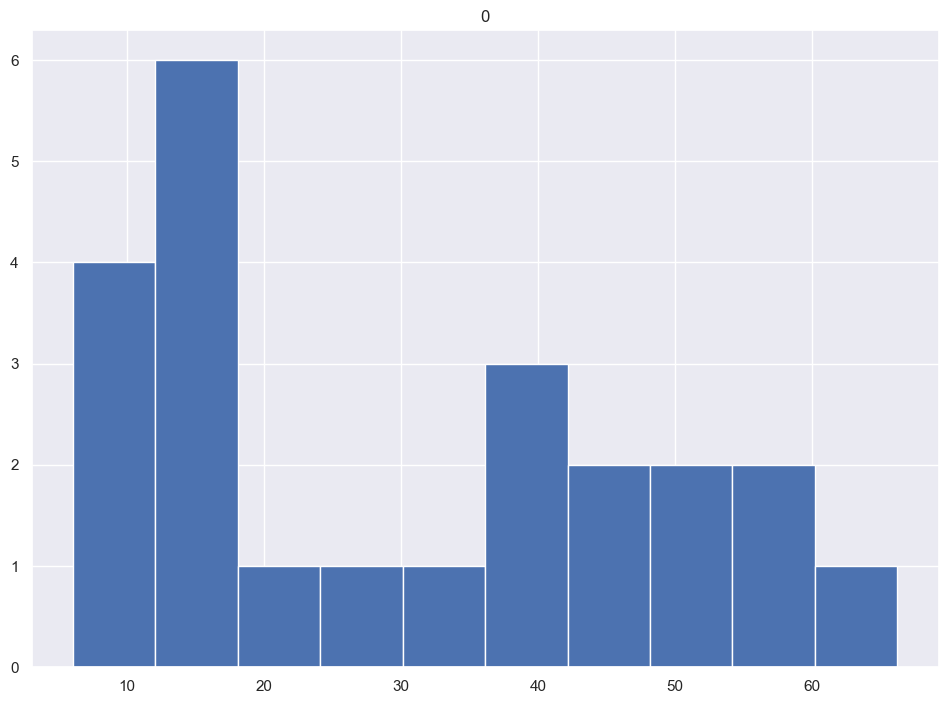

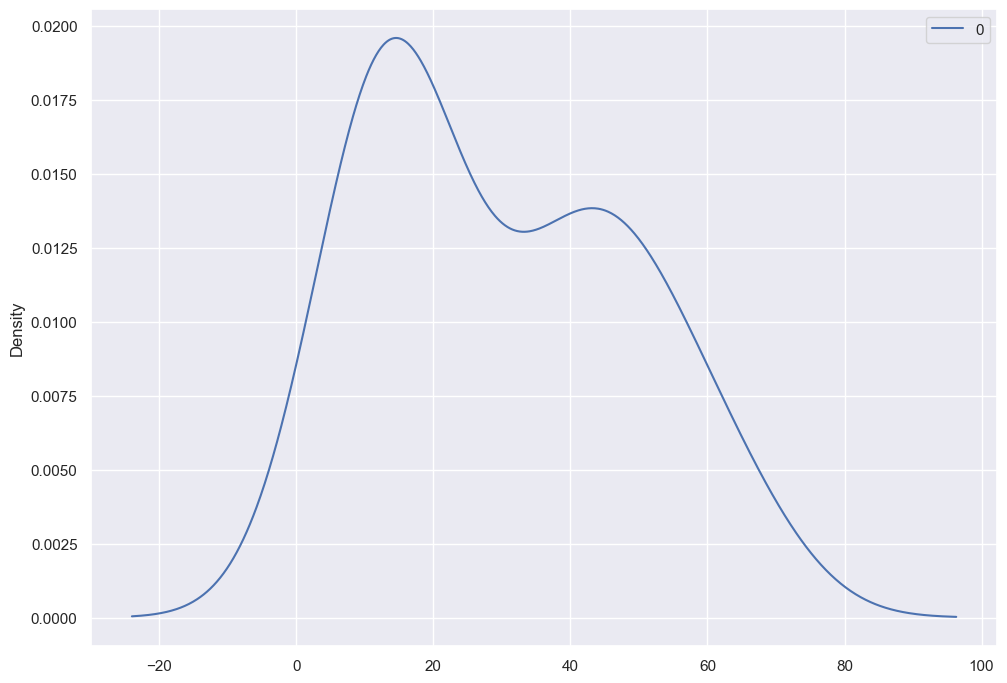

In [341]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

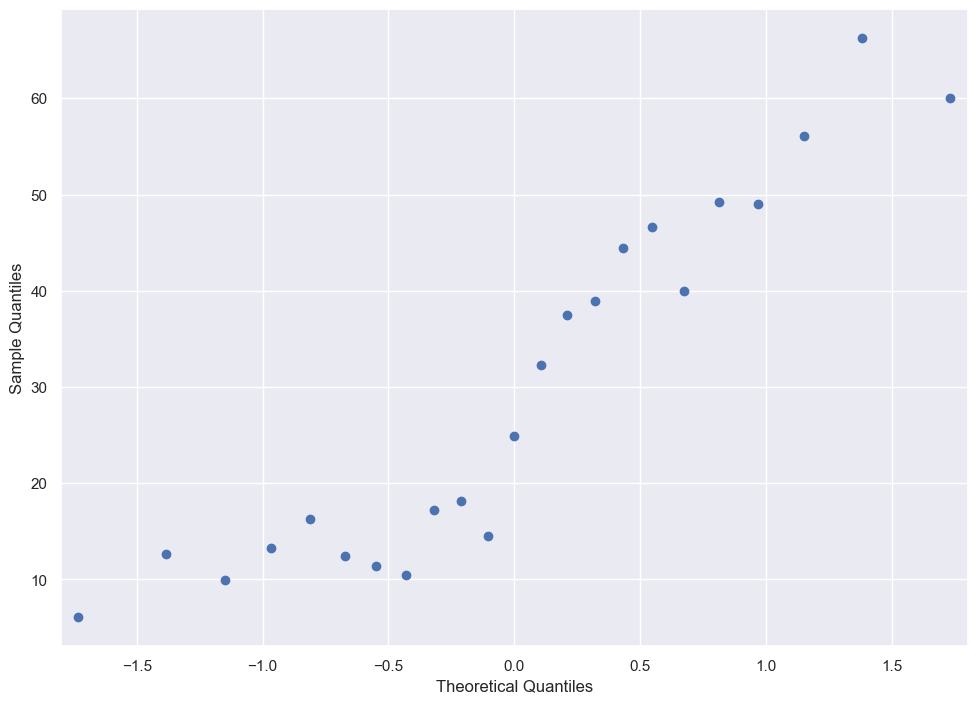

In [344]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)
plt.show()

In [396]:
#define metrics dataframe which will be used below for 
import sklearn.metrics as metrics

metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE', 'R2', 'EVAR'])

                                 
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    R2 = metrics.r2_score(actuals, predictions)
    EVAR = metrics.explained_variance_score(actuals, predictions)
    
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape,
                       'R2': R2,
                       'EVAR': EVAR}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

In [397]:
#get all the metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast1.values.flatten(), 
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast2.values.flatten(), 
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast3.values.flatten(), 
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_add_pred.values.flatten(), 
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_mul_pred.values.flatten(), 
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_add_pred.values.flatten(), 
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_mul_pred.values.flatten(), 
                                'Triple Mul')


C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\2344158486.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\2344158486.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\2344158486.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\2344158486.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Insec\AppData\L

In [398]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,R2,EVAR
0,Double Add,34.189246,28.890267,34.517147,-2.451393,1.304840e-02
0,Simple 1,34.447187,29.119281,34.797871,-2.503668,0.000000e+00
0,Double Mul,35.066556,29.669632,35.472893,-2.630794,-3.159397e-02
0,Triple Add,35.052512,29.900217,35.937125,-2.627886,1.187121e-02
0,Triple Mul,35.537085,30.249033,36.302451,-2.728885,-2.717720e-02
0,Simple 0.2,37.065408,32.174032,39.064310,-3.056514,2.220446e-16
0,Simple 0.5,37.588300,32.775054,39.903732,-3.171774,0.000000e+00


In [399]:
spy.tail(23).mean()

XOM_Spline    75.803711
dtype: float64

In [400]:
triple_ets_add_pred.values.flatten()

array([45.90387773, 44.75225707, 46.42643161, 46.44100257, 46.3498693 ,
       46.46336503, 44.5236975 , 44.61931053, 45.29905646, 45.80595016,
       46.59269195, 46.91284028, 46.1322884 , 44.98066773, 46.65484228,
       46.66941324, 46.57827997, 46.69177569, 44.75210816, 44.8477212 ,
       45.52746713, 46.03436083, 46.82110262])

In [401]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions 
test_pred_df = test_pred_df.assign(SimpleExp_0_2_pred = ins_cast1.values.flatten(),
                                   SimpleExp_1_pred = ins_cast3.values.flatten(),
                                   SimpleExp_0_5_pred = ins_cast2.values.flatten())

test_pred_df

,XOM_Spline,SimpleExp_0_2_pred,SimpleExp_1_pred,SimpleExp_0_5_pred
Date,,,,
2021-02-01,51.972455,43.629679,46.68443,43.028657
2021-03-01,57.400002,43.629679,46.68443,43.028657
2021-04-01,56.391144,43.629679,46.68443,43.028657
2021-05-01,59.662187,43.629679,46.68443,43.028657
2021-06-01,62.605000,43.629679,46.68443,43.028657
2021-07-01,58.930000,43.629679,46.68443,43.028657
2021-08-01,55.939999,43.629679,46.68443,43.028657
2021-09-01,55.120001,43.629679,46.68443,43.028657
2021-10-01,62.560001,43.629679,46.68443,43.028657


In [402]:
# Create an average prediction from the three and check it's metrics
test_pred_df['Average_Predictions'] = (test_pred_df['SimpleExp_1_pred']+test_pred_df['SimpleExp_0_2_pred']+test_pred_df['SimpleExp_0_5_pred'])/3
test_pred_df

,XOM_Spline,SimpleExp_0_2_pred,SimpleExp_1_pred,SimpleExp_0_5_pred,Average_Predictions
Date,,,,,
2021-02-01,51.972455,43.629679,46.68443,43.028657,44.447589
2021-03-01,57.400002,43.629679,46.68443,43.028657,44.447589
2021-04-01,56.391144,43.629679,46.68443,43.028657,44.447589
2021-05-01,59.662187,43.629679,46.68443,43.028657,44.447589
2021-06-01,62.605000,43.629679,46.68443,43.028657,44.447589
2021-07-01,58.930000,43.629679,46.68443,43.028657,44.447589
2021-08-01,55.939999,43.629679,46.68443,43.028657,44.447589
2021-09-01,55.120001,43.629679,46.68443,43.028657,44.447589
2021-10-01,62.560001,43.629679,46.68443,43.028657,44.447589


In [403]:
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                test_pred_df['Average_Predictions'].values.flatten(), 
                                'Average')

metrics_dataframe

C:\Users\Insec\AppData\Local\Temp\ipykernel_11568\2344158486.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)


,Model,RMSE,MAE,MAPE,R2,EVAR
0,Simple 0.2,37.065408,32.174032,39.064310,-3.056514,2.220446e-16
0,Simple 0.5,37.588300,32.775054,39.903732,-3.171774,0.000000e+00
0,Simple 1,34.447187,29.119281,34.797871,-2.503668,0.000000e+00
0,Double Add,34.189246,28.890267,34.517147,-2.451393,1.304840e-02
0,Double Mul,35.066556,29.669632,35.472893,-2.630794,-3.159397e-02
0,Triple Add,35.052512,29.900217,35.937125,-2.627886,1.187121e-02
0,Triple Mul,35.537085,30.249033,36.302451,-2.728885,-2.717720e-02
0,Average,36.357703,31.356123,37.921971,-2.903087,-2.220446e-16


In [379]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,R2,EVAR
0,Double Add,34.189246,28.890267,34.517147,-2.451393,1.304840e-02
0,Simple 1,34.447187,29.119281,34.797871,-2.503668,0.000000e+00
0,Double Mul,35.066556,29.669632,35.472893,-2.630794,-3.159397e-02
0,Triple Add,35.052512,29.900217,35.937125,-2.627886,1.187121e-02
0,Triple Mul,35.537085,30.249033,36.302451,-2.728885,-2.717720e-02
0,Average,36.357703,31.356123,37.921971,-2.903087,-2.220446e-16
0,Average,36.357703,31.356123,37.921971,-2.903087,-2.220446e-16
0,Simple 0.2,37.065408,32.174032,39.064310,-3.056514,2.220446e-16
0,Simple 0.5,37.588300,32.775054,39.903732,-3.171774,0.000000e+00
